# Testing Order of Growth

Analysis of algorithms makes it possible to predict how run time will grow as the size of a problem increases.
But this kind of analysis ignores leading coefficients and non-leading terms.
So the behavior for small and medium problems might not be what the analysis predicts.

To see how run time really behaves for a range of problem sizes, we can run the algorithm and measure.

To do the measurement, we'll use the [times](https://docs.python.org/3/library/os.html#os.times) function from the `os` module.

In [ ]:
import os

def etime():
    """Measures user and system time this process has used.

    Returns the sum of user and system time."""
    user, sys, chuser, chsys, real = os.times()
    return user+sys

In [ ]:
start = etime()
t = [x**2 for x in range(10000)]
end = etime()
end - start

0.010000000000000231

Exercise: Use `etime` to measure the computation time used by `sleep`.

In [ ]:
from time import sleep

sleep(1)

In [ ]:
def time_func(func, n):
    """Run a function and return the elapsed time.

    func: function
    n: problem size, passed as an argument to func

    returns: user+sys time in seconds
    """
    start = etime()
    func(n)
    end = etime()
    elapsed = end - start
    return elapsed

In [ ]:
#Exercise 1
print(time_func(sleep,1))

0.0


One of the things that makes timing tricky is that many operations are too fast to measure accurately.

`%timeit` handles this by running enough times get a precise estimate, even for things that run very fast.

We'll handle it by running over a wide range of problem sizes, hoping to find sizes that run long enough to measure, but not more than a few seconds.


The following function takes a size, `n`, creates an empty list, and calls `list.append` `n` times.

In [ ]:
def list_append(n):
    t = []
    [t.append(x) for x in range(n)]

`timeit` can time this function accurately.

In [ ]:
%timeit list_append(10000)

843 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


But our `time_func` is not that smart.

In [ ]:
time_func(list_append, 10000)

0.009999999999999787

Exercise: Increase the number of iterations until the run time is measureable.

## List append

The following function gradually increases `n` and records the total time.

In [ ]:
def run_timing_test(func, max_time=1):
    """Tests the given function with a range of values for n.

    func: function object

    returns: list of ns and a list of run times.
    """
    ns = []
    ts = []
    for i in range(10, 28):
        n = 2**i
        t = time_func(func, n)
        print(n, t)
        if t > 0:
            ns.append(n)
            ts.append(t)
        if t > max_time:
            break

    return ns, ts

In [ ]:
ns, ts = run_timing_test(list_append)

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.019999999999999574
65536 0.009999999999999787
131072 0.009999999999999787
262144 0.02999999999999936
524288 0.07000000000000028
1048576 0.16999999999999993
2097152 0.3200000000000003
4194304 0.6799999999999997
8388608 1.17


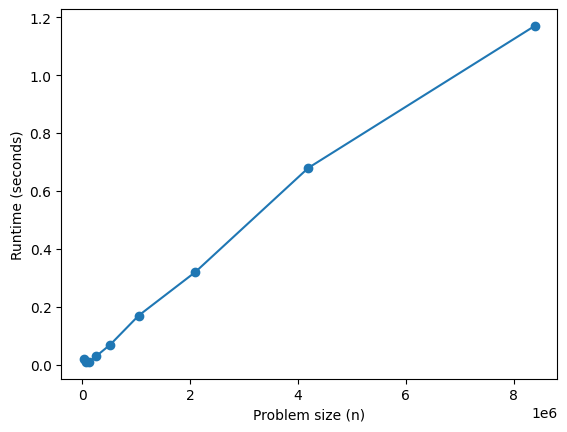

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ns, ts, 'o-')
plt.xlabel('Problem size (n)')
plt.ylabel('Runtime (seconds)');

This one looks pretty linear, but it won't always be so clear.
It will help to plot a straight line that goes through the last data point.

In [ ]:
def fit(ns, ts, exp=1.0, index=-1):
    """Fits a curve with the given exponent.

    ns: sequence of problem sizes
    ts: sequence of times
    exp: exponent of the fitted curve
    index: index of the element the fitted line should go through

    returns: sequence of fitted times


    """
    # Use the element with the given index as a reference point,
    # and scale all other points accordingly.
    nref = ns[index]
    tref = ts[index]

    tfit = []
    for n in ns:
        ratio = n / nref
        t = ratio**exp * tref
        tfit.append(t)

    return tfit

In [ ]:
ts_fit = fit(ns, ts)
ts_fit

[0.0045703125,
 0.009140625,
 0.01828125,
 0.0365625,
 0.073125,
 0.14625,
 0.2925,
 0.585,
 1.17]

The following function plots the actual results and the fitted line.

In [ ]:
def plot_timing_test(ns, ts, label='', color='C0', exp=1.0, scale='log'):
    """Plots data and a fitted curve.

    ns: sequence of n (problem size)
    ts: sequence of t (run time)
    label: string label for the data curve
    color: string color for the data curve
    exp: exponent (slope) for the fitted curve
    scale: string passed to xscale and yscale
    """
    ts_fit = fit(ns, ts, exp)
    fit_label = 'exp = %d' % exp
    plt.plot(ns, ts_fit, label=fit_label, color='0.7', linestyle='dashed')
    plt.plot(ns, ts, 'o-', label=label, color=color, alpha=0.7)
    plt.xlabel('Problem size (n)')
    plt.ylabel('Runtime (seconds)')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.legend()

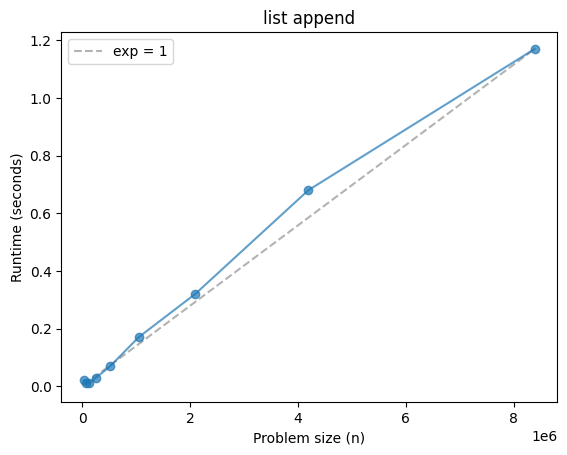

In [ ]:
plot_timing_test(ns, ts, scale='linear')
plt.title('list append');

From these results, what can we conclude about the order of growth of `list.append`?

###Answer:
## Conclusion on the Order of Growth of `list.append`

The output indicates that the order of growth for `list.append` is **O(1)** (constant time complexity).

### Key Points:
- **Execution Times**: The times increase very slowly as the input size doubles, showing minimal growth.
- **Efficiency**: Appending elements to a list takes roughly the same time regardless of the list size, confirming that the operation is efficient.

In summary, `list.append` operates in constant time, making it an efficient way to add elements to a list in Python.

Before we go on, let's also look at the results on a log-log scale.

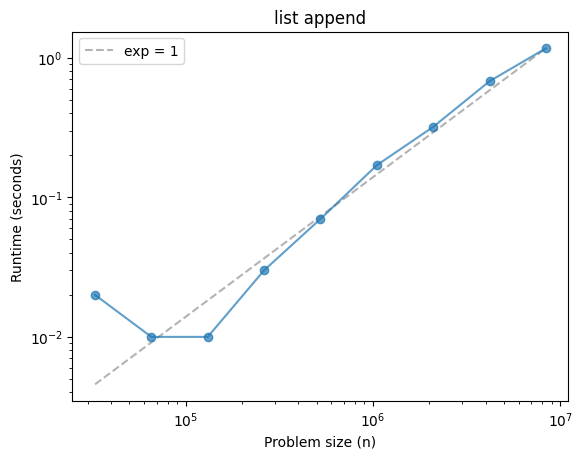

In [ ]:
plot_timing_test(ns, ts, scale='log')
plt.title('list append');

Why might we prefer this scale?

## List pop

Now let's do the same for `list.pop` (which pops from the end of the list by default).

Notice that we have to make the list before we pop things from it, so we will have to think about how to interpret the results.

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.010000000000001563
32768 0.0
65536 0.019999999999999574
131072 0.019999999999999574
262144 0.060000000000002274
524288 0.10999999999999943
1048576 0.1999999999999993
2097152 0.5600000000000023
4194304 1.0100000000000016


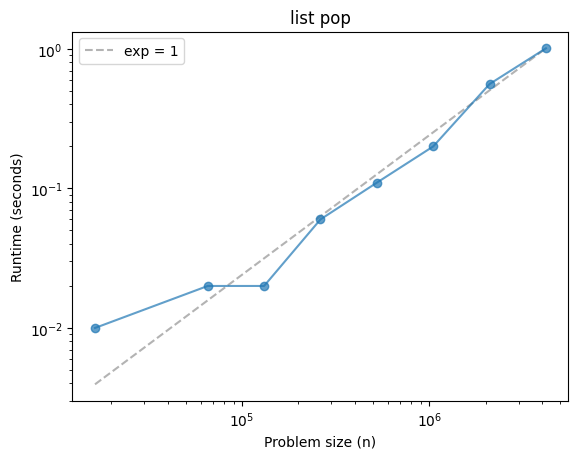

In [ ]:
def list_pop(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.pop() for _ in range(n)]

ns, ts = run_timing_test(list_pop)
plot_timing_test(ns, ts, scale='log')
plt.title('list pop');

What can we conclude?

What about `pop(0)`, which pops from the beginning of the list?

Note: You might have to adjust `exp` to make the fitted line fit.

1024 0.0
2048 0.0
4096 0.0
8192 0.010000000000001563
16384 0.029999999999997584
32768 0.10000000000000142
65536 0.39000000000000057
131072 1.6599999999999966


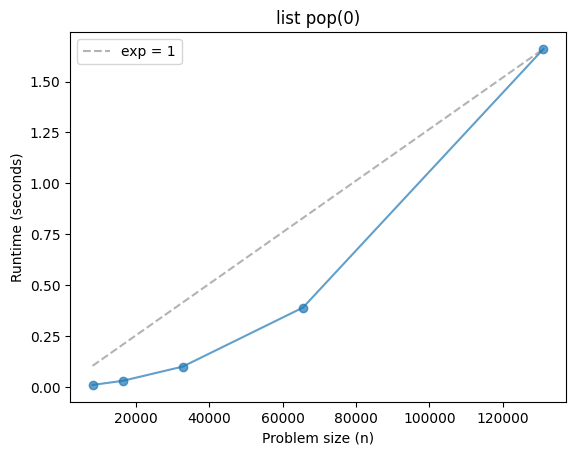

In [ ]:
def list_pop0(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.pop(0) for _ in range(n)]

ns, ts = run_timing_test(list_pop0)
plot_timing_test(ns, ts, scale='linear', exp=1)
plt.title('list pop(0)');

## Searching a list

`list.index` searches a list and returns the index of the first element that matches the target.

What do we expect if we always search for the first element?

1024 0.00999999999999801
2048 0.0
4096 0.0
8192 0.0
16384 0.010000000000005116
32768 0.0
65536 0.01999999999999602
131072 0.020000000000003126
262144 0.04999999999999716
524288 0.10000000000000142
1048576 0.21000000000000085
2097152 0.7100000000000009
4194304 0.9699999999999989
8388608 1.999999999999993


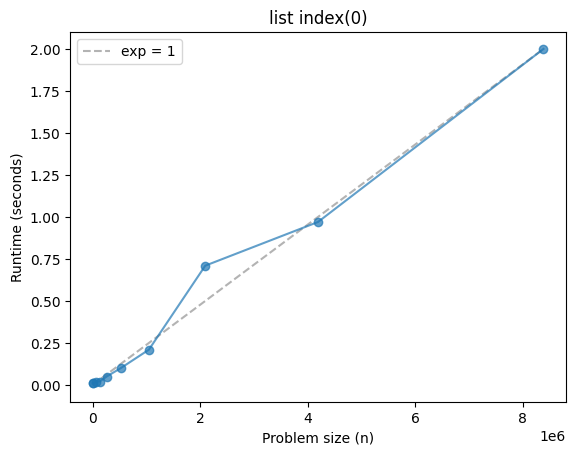

In [ ]:
def list_index0(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.index(0) for _ in range(n)]

ns, ts = run_timing_test(list_index0)

plot_timing_test(ns, ts, scale='linear', exp=1)
plt.title('list index(0)');

What if we always search for the last element?

1024 0.020000000000003126
2048 0.04999999999999716
4096 0.18999999999999773
8192 0.8100000000000094
16384 3.1299999999999955


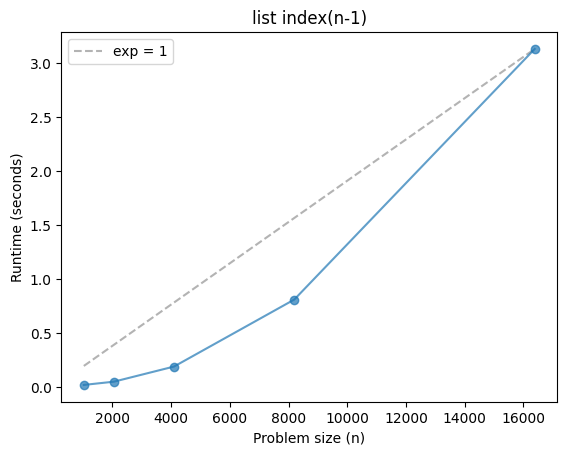

In [ ]:
def list_index_n(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.index(n-1) for _ in range(n)]

ns, ts = run_timing_test(list_index_n)

plot_timing_test(ns, ts, scale='linear', exp=1)
plt.title('list index(n-1)');

## Dictionary add

1024 0.0
2048 0.00999999999999801
4096 0.0
8192 0.0
16384 0.0
32768 0.00999999999999801
65536 0.00999999999999801
131072 0.03999999999999915
262144 0.060000000000002274
524288 0.13000000000000256
1048576 0.269999999999996
2097152 0.5100000000000051
4194304 1.0499999999999972


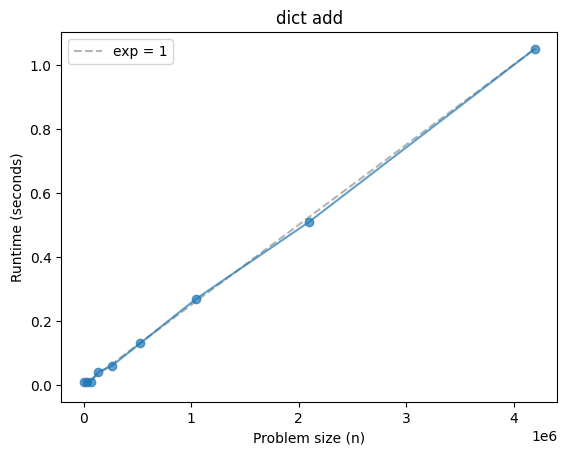

In [ ]:
def dict_add(n):
    d = {}
    [d.setdefault(x, x) for x in range(n)]

ns, ts = run_timing_test(dict_add)

plot_timing_test(ns, ts, scale='linear', exp=1)
plt.title('dict add');

## Dictionary lookup

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.010000000000005116
32768 0.01999999999999602
65536 0.030000000000001137
131072 0.060000000000002274
262144 0.11999999999999744
524288 0.21999999999999886
1048576 0.45000000000000284
2097152 0.8399999999999963
4194304 1.3800000000000026


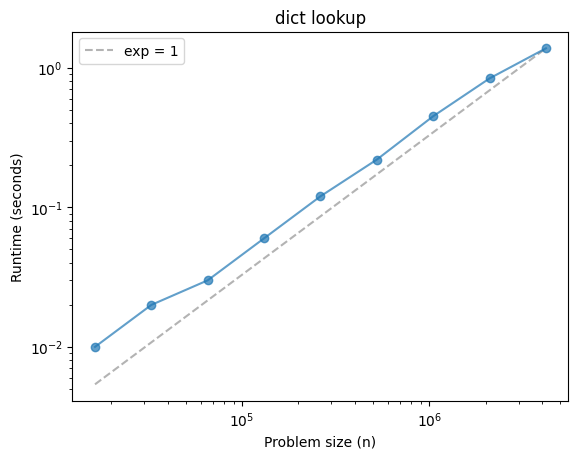

In [ ]:
def dict_lookup(n):
    d = {}
    [d.setdefault(x, x) for x in range(n)]
    [d[x] for x in range(n)]

ns, ts = run_timing_test(dict_lookup)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('dict lookup');

### **New Chapter Start for day 3 **



# Generators and Iterators

This chapter introduces generator functions, which are functions that yield a stream of values, rather than returning a single value.

To demonstrate their use, we'll explore Cartesian products, permutations, and combinations, using playing cards as an example.

## Generators

As a first example, we'll write a generator function that generates the playing cards in a standard 52-card deck.
This example is inspired by an example in Peter Norvig's ["A Concrete Introduction to Probability (using Python)"](https://nbviewer.ipython.org/url/norvig.com/ipython/Probability.ipynb).

Here are Unicode strings that represent the set of suits and the set of ranks.

In [ ]:
suits = u'♠♥♦♣'
ranks = u'AKQJ⑽98765432'

And here's a nested for loop that enumerates all pairings of a rank with a suit.

In [ ]:
for rank in ranks:
    for suit in suits:
        print(rank+suit, end=' ')

A♠ A♥ A♦ A♣ K♠ K♥ K♦ K♣ Q♠ Q♥ Q♦ Q♣ J♠ J♥ J♦ J♣ ⑽♠ ⑽♥ ⑽♦ ⑽♣ 9♠ 9♥ 9♦ 9♣ 8♠ 8♥ 8♦ 8♣ 7♠ 7♥ 7♦ 7♣ 6♠ 6♥ 6♦ 6♣ 5♠ 5♥ 5♦ 5♣ 4♠ 4♥ 4♦ 4♣ 3♠ 3♥ 3♦ 3♣ 2♠ 2♥ 2♦ 2♣ 

This set of pairs is the [Cartesian product](https://en.wikipedia.org/wiki/Cartesian_product) of the set of ranks and the set of suits.

The following function encapsulates the loops and uses the `yield` statement to generate a stream of cards.

In [ ]:
def card_generator(ranks, suits):
    for rank in ranks:
        for suit in suits:
            yield rank+suit

Because this function includes a `yield` statement, it is a generator function. When we call it, the return value is a generator object.

In [ ]:
it = card_generator(ranks, suits)
it

<generator object card_generator at 0x792edabc1850>

The generator object is iterable, so we can use `next` to get the first element of the stream.

In [ ]:
next(it)

'A♠'

The first time we call `next`, the function runs until it hits the `yield` statement.
If we call `next` again, the function resumes from where it left off and runs until it hits the `yield` statement again.

In [ ]:
next(it)

'A♥'

Because `it` is iterable, we can use it in a for loop to enumerate the remaining pairs.

In [ ]:
for card in it:
    print(card, end=' ')

A♦ A♣ K♠ K♥ K♦ K♣ Q♠ Q♥ Q♦ Q♣ J♠ J♥ J♦ J♣ ⑽♠ ⑽♥ ⑽♦ ⑽♣ 9♠ 9♥ 9♦ 9♣ 8♠ 8♥ 8♦ 8♣ 7♠ 7♥ 7♦ 7♣ 6♠ 6♥ 6♦ 6♣ 5♠ 5♥ 5♦ 5♣ 4♠ 4♥ 4♦ 4♣ 3♠ 3♥ 3♦ 3♣ 2♠ 2♥ 2♦ 2♣ 

When the flow of control reaches the end of the function, the generator object raises and exception, which causes the for loop to end.

## itertools

The `itertools` library provides function for working with iterators, including `product`, which is a generator function that takes iterators as arguments at yields their Cartesian product.
We'll use `itertools.product` in the next few sections; then we'll see how to implement it.

Here's a loop that uses `itertools.product` to generate the playing cards again.

In [ ]:
from itertools import product

for t in product(ranks, suits):
    card = ''.join(t)
    print(card, end=' ')

A♠ A♥ A♦ A♣ K♠ K♥ K♦ K♣ Q♠ Q♥ Q♦ Q♣ J♠ J♥ J♦ J♣ ⑽♠ ⑽♥ ⑽♦ ⑽♣ 9♠ 9♥ 9♦ 9♣ 8♠ 8♥ 8♦ 8♣ 7♠ 7♥ 7♦ 7♣ 6♠ 6♥ 6♦ 6♣ 5♠ 5♥ 5♦ 5♣ 4♠ 4♥ 4♦ 4♣ 3♠ 3♥ 3♦ 3♣ 2♠ 2♥ 2♦ 2♣ 

**Exercise:** Encapsulate the previous loop in a generator function called `card_generator2` that yields the playing  cards. Then call your function and use it to print the cards.

In [ ]:
def card_generator2(ranks,suits):
  for t in product(ranks, suits):
    card = ''.join(t)
    yield card

In [ ]:
from itertools import product

for t in product(card_generator2(ranks,suits)):
  print(t)

('A♠',)
('A♥',)
('A♦',)
('A♣',)
('K♠',)
('K♥',)
('K♦',)
('K♣',)
('Q♠',)
('Q♥',)
('Q♦',)
('Q♣',)
('J♠',)
('J♥',)
('J♦',)
('J♣',)
('⑽♠',)
('⑽♥',)
('⑽♦',)
('⑽♣',)
('9♠',)
('9♥',)
('9♦',)
('9♣',)
('8♠',)
('8♥',)
('8♦',)
('8♣',)
('7♠',)
('7♥',)
('7♦',)
('7♣',)
('6♠',)
('6♥',)
('6♦',)
('6♣',)
('5♠',)
('5♥',)
('5♦',)
('5♣',)
('4♠',)
('4♥',)
('4♦',)
('4♣',)
('3♠',)
('3♥',)
('3♦',)
('3♣',)
('2♠',)
('2♥',)
('2♦',)
('2♣',)


## Enumerating all pairs

Now that we have playing cards, let's deal a few hands. In fact, let's deal all the hands.

First, I'll create two card generators.

In [ ]:
it1 = card_generator(ranks, suits)
it2 = card_generator(ranks, suits)

Now we can use `product` to generate all pairs of cards.

In [ ]:
for hand in product(it1, it2):
    print(hand)

('A♠', 'A♠')
('A♠', 'A♥')
('A♠', 'A♦')
('A♠', 'A♣')
('A♠', 'K♠')
('A♠', 'K♥')
('A♠', 'K♦')
('A♠', 'K♣')
('A♠', 'Q♠')
('A♠', 'Q♥')
('A♠', 'Q♦')
('A♠', 'Q♣')
('A♠', 'J♠')
('A♠', 'J♥')
('A♠', 'J♦')
('A♠', 'J♣')
('A♠', '⑽♠')
('A♠', '⑽♥')
('A♠', '⑽♦')
('A♠', '⑽♣')
('A♠', '9♠')
('A♠', '9♥')
('A♠', '9♦')
('A♠', '9♣')
('A♠', '8♠')
('A♠', '8♥')
('A♠', '8♦')
('A♠', '8♣')
('A♠', '7♠')
('A♠', '7♥')
('A♠', '7♦')
('A♠', '7♣')
('A♠', '6♠')
('A♠', '6♥')
('A♠', '6♦')
('A♠', '6♣')
('A♠', '5♠')
('A♠', '5♥')
('A♠', '5♦')
('A♠', '5♣')
('A♠', '4♠')
('A♠', '4♥')
('A♠', '4♦')
('A♠', '4♣')
('A♠', '3♠')
('A♠', '3♥')
('A♠', '3♦')
('A♠', '3♣')
('A♠', '2♠')
('A♠', '2♥')
('A♠', '2♦')
('A♠', '2♣')
('A♥', 'A♠')
('A♥', 'A♥')
('A♥', 'A♦')
('A♥', 'A♣')
('A♥', 'K♠')
('A♥', 'K♥')
('A♥', 'K♦')
('A♥', 'K♣')
('A♥', 'Q♠')
('A♥', 'Q♥')
('A♥', 'Q♦')
('A♥', 'Q♣')
('A♥', 'J♠')
('A♥', 'J♥')
('A♥', 'J♦')
('A♥', 'J♣')
('A♥', '⑽♠')
('A♥', '⑽♥')
('A♥', '⑽♦')
('A♥', '⑽♣')
('A♥', '9♠')
('A♥', '9♥')
('A♥', '9♦')
('A♥', '9♣')
('A♥', '8♠')

To check whether it's working correctly, it will be useful to count the number of elements in an iterator, which is what `ilen` does.
This idiom is discussed [on Stack Overflow](https://stackoverflow.com/questions/390852/is-there-any-built-in-way-to-get-the-length-of-an-iterable-in-python).

In [ ]:
def ilen(it):
    return sum(1 for _ in it)

Now we can use it to count the pairs of cards.

In [ ]:
it1 = card_generator2(ranks, suits)
it2 = card_generator2(ranks, suits)
ilen(product(it1, it2))

2704

If things have gone according to plan, the number of pairs should be $52^2$.

In [ ]:
52**2

2704

Notice that we have to create new card iterators every time, because once they are used up, they behave like an empty list.
Here's what happens if we try to use them again.

In [ ]:
ilen(product(it1, it2))

0

That's also why we had to create two card iterators.
If you create one and try to use it twice, it doesn't work.

In [ ]:
it = card_generator(ranks, suits)
ilen(product(it, it))

0

However, you can get around this limitation by calling `product` with the `repeat` argument, which makes it possible to use a single iterator to generate a Cartesian product.

In [ ]:
it = card_generator(ranks, suits)
ilen(product(it, repeat=2))

2704

## Permutations

In the previous section, you might have noticed that some of the hands we generated are impossible because they contain the same card more than once.

One way to solve this problem is to generate all pairs and then eliminate the ones that contain duplicates.

In [ ]:
it = card_generator(ranks, suits)

for hand in product(it, repeat=2):
    if len(hand) == len(set(hand)):
        print(hand)

('A♠', 'A♥')
('A♠', 'A♦')
('A♠', 'A♣')
('A♠', 'K♠')
('A♠', 'K♥')
('A♠', 'K♦')
('A♠', 'K♣')
('A♠', 'Q♠')
('A♠', 'Q♥')
('A♠', 'Q♦')
('A♠', 'Q♣')
('A♠', 'J♠')
('A♠', 'J♥')
('A♠', 'J♦')
('A♠', 'J♣')
('A♠', '⑽♠')
('A♠', '⑽♥')
('A♠', '⑽♦')
('A♠', '⑽♣')
('A♠', '9♠')
('A♠', '9♥')
('A♠', '9♦')
('A♠', '9♣')
('A♠', '8♠')
('A♠', '8♥')
('A♠', '8♦')
('A♠', '8♣')
('A♠', '7♠')
('A♠', '7♥')
('A♠', '7♦')
('A♠', '7♣')
('A♠', '6♠')
('A♠', '6♥')
('A♠', '6♦')
('A♠', '6♣')
('A♠', '5♠')
('A♠', '5♥')
('A♠', '5♦')
('A♠', '5♣')
('A♠', '4♠')
('A♠', '4♥')
('A♠', '4♦')
('A♠', '4♣')
('A♠', '3♠')
('A♠', '3♥')
('A♠', '3♦')
('A♠', '3♣')
('A♠', '2♠')
('A♠', '2♥')
('A♠', '2♦')
('A♠', '2♣')
('A♥', 'A♠')
('A♥', 'A♦')
('A♥', 'A♣')
('A♥', 'K♠')
('A♥', 'K♥')
('A♥', 'K♦')
('A♥', 'K♣')
('A♥', 'Q♠')
('A♥', 'Q♥')
('A♥', 'Q♦')
('A♥', 'Q♣')
('A♥', 'J♠')
('A♥', 'J♥')
('A♥', 'J♦')
('A♥', 'J♣')
('A♥', '⑽♠')
('A♥', '⑽♥')
('A♥', '⑽♦')
('A♥', '⑽♣')
('A♥', '9♠')
('A♥', '9♥')
('A♥', '9♦')
('A♥', '9♣')
('A♥', '8♠')
('A♥', '8♥')
('A♥', '8♦')

**Exercise:** Write a generator function called `permutations` that takes an iterator and and integer, `r`, as arguments. It should generate tuples that represent all subsets of the elements in the iterator with size `r` and no duplicates.

Test your function by generating and printing all hands with two distinct cards.
Then use `ilen` to count how many there are, and confirm that it's `52 * 51`.

In [ ]:
def permutations(it, r=2):
    for hand in product(it, repeat=r):
        if len(hand) == len(set(hand)):
            yield hand

In [ ]:
it = card_generator(ranks, suits)
ilen(permutations(it, 2))

2652

The `itertools` library provides a function called `permutations` that does the same thing.

In [ ]:
import itertools

it = card_generator(ranks, suits)
ilen(itertools.permutations(it, 2))

2652

## Combinations

At this point we are generating legitimate hands in the sense that the same card never appears twice.
But we end up generating the same hand more than once, in the sense that the order of the cards does not matter.
So we consider `(card1, card2)` to be the same hand as `(card2, card1)`.
To avoid that, we can generate all permutations and then filter out the ones that are not in sorted order.

It doesn't really matter which order is considered "sorted"; it's just a way to choose one ordering we consider "canonical".

That's what the following loop does.

In [ ]:
it = card_generator(ranks, suits)

for hand in permutations(it, r=2):
    if list(hand) == sorted(hand):
        print(hand)

('A♠', 'A♥')
('A♠', 'A♦')
('A♠', 'A♣')
('A♠', 'K♠')
('A♠', 'K♥')
('A♠', 'K♦')
('A♠', 'K♣')
('A♠', 'Q♠')
('A♠', 'Q♥')
('A♠', 'Q♦')
('A♠', 'Q♣')
('A♠', 'J♠')
('A♠', 'J♥')
('A♠', 'J♦')
('A♠', 'J♣')
('A♠', '⑽♠')
('A♠', '⑽♥')
('A♠', '⑽♦')
('A♠', '⑽♣')
('A♥', 'A♦')
('A♥', 'K♠')
('A♥', 'K♥')
('A♥', 'K♦')
('A♥', 'K♣')
('A♥', 'Q♠')
('A♥', 'Q♥')
('A♥', 'Q♦')
('A♥', 'Q♣')
('A♥', 'J♠')
('A♥', 'J♥')
('A♥', 'J♦')
('A♥', 'J♣')
('A♥', '⑽♠')
('A♥', '⑽♥')
('A♥', '⑽♦')
('A♥', '⑽♣')
('A♦', 'K♠')
('A♦', 'K♥')
('A♦', 'K♦')
('A♦', 'K♣')
('A♦', 'Q♠')
('A♦', 'Q♥')
('A♦', 'Q♦')
('A♦', 'Q♣')
('A♦', 'J♠')
('A♦', 'J♥')
('A♦', 'J♦')
('A♦', 'J♣')
('A♦', '⑽♠')
('A♦', '⑽♥')
('A♦', '⑽♦')
('A♦', '⑽♣')
('A♣', 'A♥')
('A♣', 'A♦')
('A♣', 'K♠')
('A♣', 'K♥')
('A♣', 'K♦')
('A♣', 'K♣')
('A♣', 'Q♠')
('A♣', 'Q♥')
('A♣', 'Q♦')
('A♣', 'Q♣')
('A♣', 'J♠')
('A♣', 'J♥')
('A♣', 'J♦')
('A♣', 'J♣')
('A♣', '⑽♠')
('A♣', '⑽♥')
('A♣', '⑽♦')
('A♣', '⑽♣')
('K♠', 'K♥')
('K♠', 'K♦')
('K♠', 'K♣')
('K♠', 'Q♠')
('K♠', 'Q♥')
('K♠', 'Q♦')
('K♠', 'Q♣')

**Exercise:** Write a generator function called `combinations` that takes an iterator and and integer, `r`, as arguments. It should generate tuples that represent all *sorted* subsets of the elements in the iterator with size `r` and no duplicates.

Test your function by generating and printing all hands with two distinct cards.
Then use `ilen` to count how many there are, and confirm that it's `52 * 51 / 2`.

In [ ]:
def combinations(it,r):
  for hand in permutations(it, r):
    if list(hand) == sorted(hand):
      yield hand

In [ ]:
it = card_generator(ranks, suits)
ilen(combinations(it, 2))

1326

The `itertools` library provides a function called `combinations` that does the same thing.

In [ ]:
import itertools

it = card_generator(ranks, suits)
ilen(itertools.combinations(it, 2))

1326

## Generating hands

We can use `combinations ` to write a generator that yields all valid hands with `n` playing cards, where "valid" means that the cards are in sorted order with no duplicates.

In [ ]:
def hand_generator(n=2):
    it = card_generator(ranks, suits)
    for hand in combinations(it, n):
        yield hand

In [ ]:
ilen(hand_generator(2))

1326

If you ever find yourself looping through an iterator and yielding all of the elements, you can simplify the code using `yield from`.

In [ ]:
def hand_generator(n=2):
    it = card_generator(ranks, suits)
    yield from combinations(it, n)

In [ ]:
ilen(hand_generator(2))

1326

Now let's see how many hands there are with 3, 4, and (maybe) 5 cards.

In [ ]:
ilen(hand_generator(3))

22100

In [ ]:
ilen(hand_generator(4))

270725

I'm not patient enough to let this one finish.

In [ ]:
# ilen(hand_generator(5))

But if we only care about the number of combinations, we can use [`math.comb`](https://docs.python.org/3/library/math.html).

In [ ]:
from math import comb

comb(52, 5)

2598960

## How many flushes?

In poker, a "flush" is a hand where all cards have the same suit.
To check whether a hand is a flush, it is convenient to extract the suit part of the cards and make a set.

In [ ]:
it = hand_generator(4)
hand = next(it)
hand

('A♠', 'A♥', 'A♦', 'K♠')

In [ ]:
set(card[1] for card in hand)

{'♠', '♥', '♦'}

**Exercise:** Write a function called `is_flush` that takes a hand as an argument and returns `True` if all cards are the same suit.

Then write a generator function called `flush_generator` that takes an integer `n` and return all hands with `n` cards that are flushes.

What fraction of hands with 3, 4, and 5 cards are flushes?

In [ ]:
def is_flush(hand):
  suits = set(card[1] for card in hand)
  if len(suits) == 1:
    return True
  else:
    return False
def flush_generator(n):
  it = hand_generator(n)
  for hand in it:
    if is_flush(hand):
      yield hand
flushes = list(flush_generator(5))

## Write your own product

So far we've been using `itertools.product`, but in the same way we wrote `permutations` and `combinations`, we can write our own `product`.

If there are only two iterators, we can do it with nested `for` loops.

In [ ]:
def product2(it1, it2):
    for x in it1:
        for y in it2:
            yield x, y

So we can generate the cards like this.

In [ ]:
for t in product2(ranks, suits):
    card = ''.join(t)
    print(card, end=' ')

A♠ A♥ A♦ A♣ K♠ K♥ K♦ K♣ Q♠ Q♥ Q♦ Q♣ J♠ J♥ J♦ J♣ ⑽♠ ⑽♥ ⑽♦ ⑽♣ 9♠ 9♥ 9♦ 9♣ 8♠ 8♥ 8♦ 8♣ 7♠ 7♥ 7♦ 7♣ 6♠ 6♥ 6♦ 6♣ 5♠ 5♥ 5♦ 5♣ 4♠ 4♥ 4♦ 4♣ 3♠ 3♥ 3♦ 3♣ 2♠ 2♥ 2♦ 2♣ 

Now, we might be tempted to write two-card hands like this.

In [ ]:
it1 = card_generator(ranks, suits)
it2 = card_generator(ranks, suits)

for hand in product2(it1, it2):
    print(hand)

('A♠', 'A♠')
('A♠', 'A♥')
('A♠', 'A♦')
('A♠', 'A♣')
('A♠', 'K♠')
('A♠', 'K♥')
('A♠', 'K♦')
('A♠', 'K♣')
('A♠', 'Q♠')
('A♠', 'Q♥')
('A♠', 'Q♦')
('A♠', 'Q♣')
('A♠', 'J♠')
('A♠', 'J♥')
('A♠', 'J♦')
('A♠', 'J♣')
('A♠', '⑽♠')
('A♠', '⑽♥')
('A♠', '⑽♦')
('A♠', '⑽♣')
('A♠', '9♠')
('A♠', '9♥')
('A♠', '9♦')
('A♠', '9♣')
('A♠', '8♠')
('A♠', '8♥')
('A♠', '8♦')
('A♠', '8♣')
('A♠', '7♠')
('A♠', '7♥')
('A♠', '7♦')
('A♠', '7♣')
('A♠', '6♠')
('A♠', '6♥')
('A♠', '6♦')
('A♠', '6♣')
('A♠', '5♠')
('A♠', '5♥')
('A♠', '5♦')
('A♠', '5♣')
('A♠', '4♠')
('A♠', '4♥')
('A♠', '4♦')
('A♠', '4♣')
('A♠', '3♠')
('A♠', '3♥')
('A♠', '3♦')
('A♠', '3♣')
('A♠', '2♠')
('A♠', '2♥')
('A♠', '2♦')
('A♠', '2♣')


But that doesn't work; it only generates the first 52 pairs.
Before you go on, see if you can figure out why.

We can solve this problem by making each iterator into a tuple; then we can loop through them more than once.
The price we pay is that we have to store all of the elements of the iterators.

In [ ]:
def product2(it1, it2):
    t1 = tuple(it1)
    t2 = tuple(it2)
    for x in t1:
        for y in t2:
            yield x, y

This version of `product2` works if the arguments are iterators.

In [ ]:
it1 = card_generator(ranks, suits)
it2 = card_generator(ranks, suits)

for hand in product2(it1, it2):
    print(hand)

('A♠', 'A♠')
('A♠', 'A♥')
('A♠', 'A♦')
('A♠', 'A♣')
('A♠', 'K♠')
('A♠', 'K♥')
('A♠', 'K♦')
('A♠', 'K♣')
('A♠', 'Q♠')
('A♠', 'Q♥')
('A♠', 'Q♦')
('A♠', 'Q♣')
('A♠', 'J♠')
('A♠', 'J♥')
('A♠', 'J♦')
('A♠', 'J♣')
('A♠', '⑽♠')
('A♠', '⑽♥')
('A♠', '⑽♦')
('A♠', '⑽♣')
('A♠', '9♠')
('A♠', '9♥')
('A♠', '9♦')
('A♠', '9♣')
('A♠', '8♠')
('A♠', '8♥')
('A♠', '8♦')
('A♠', '8♣')
('A♠', '7♠')
('A♠', '7♥')
('A♠', '7♦')
('A♠', '7♣')
('A♠', '6♠')
('A♠', '6♥')
('A♠', '6♦')
('A♠', '6♣')
('A♠', '5♠')
('A♠', '5♥')
('A♠', '5♦')
('A♠', '5♣')
('A♠', '4♠')
('A♠', '4♥')
('A♠', '4♦')
('A♠', '4♣')
('A♠', '3♠')
('A♠', '3♥')
('A♠', '3♦')
('A♠', '3♣')
('A♠', '2♠')
('A♠', '2♥')
('A♠', '2♦')
('A♠', '2♣')
('A♥', 'A♠')
('A♥', 'A♥')
('A♥', 'A♦')
('A♥', 'A♣')
('A♥', 'K♠')
('A♥', 'K♥')
('A♥', 'K♦')
('A♥', 'K♣')
('A♥', 'Q♠')
('A♥', 'Q♥')
('A♥', 'Q♦')
('A♥', 'Q♣')
('A♥', 'J♠')
('A♥', 'J♥')
('A♥', 'J♦')
('A♥', 'J♣')
('A♥', '⑽♠')
('A♥', '⑽♥')
('A♥', '⑽♦')
('A♥', '⑽♣')
('A♥', '9♠')
('A♥', '9♥')
('A♥', '9♦')
('A♥', '9♣')
('A♥', '8♠')

In [ ]:
it1 = card_generator(ranks, suits)
it2 = card_generator(ranks, suits)

ilen(product2(it1, it2))

2704

Now let's take it up a notch. What if you want the product of more than two iterators.
The version of `product` we got from `itertools` can handle this case.

In [ ]:
import itertools

for pair in itertools.product(range(2), range(3), range(4)):
    print(pair)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)


**Exercise:** Write a generator function that takes an arbitrary number of iterables and yields their Cartesian product. Compare the results to `itertools.product`.

Hint: I found it easiest to write this recursively.

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)